In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
df = pd.read_csv(r'D:/Hella/demo_low_level2/timestamps.txt', header=None)
# df = pd.read_csv('../timestamps_demo_event.txt', header=None)
# df = pd.read_csv('../timestamps_demo1.txt', header=None)
df.columns = ['timestamp']
print(df.shape)
df.head()

(48000, 1)


timestamp
0  5524433.9
1  5529145.8
2  5531670.0
3  5534170.6
4  5536688.8

In [11]:
df_diffs = df.diff()
df_diffs.columns = ['frame_diff']
df_diffs

frame_diff
0             NaN
1          4711.9
2          2524.2
3          2500.6
4          2518.2
...           ...
47995      2486.6
47996      2502.7
47997      2491.7
47998      2515.6
47999      2496.9

[48000 rows x 1 columns]

In [12]:
df_diffs.rolling(window=400).mean()

frame_diff
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
47995  2507.78325
47996  2507.70800
47997  2507.78475
47998  2507.84350
47999  2507.81925

[48000 rows x 1 columns]

In [13]:
df_diffs.describe()

frame_diff
count  47999.000000
mean    2511.501519
std      216.961005
min     1447.900000
25%     2503.900000
50%     2506.000000
75%     2509.200000
max    32114.100000

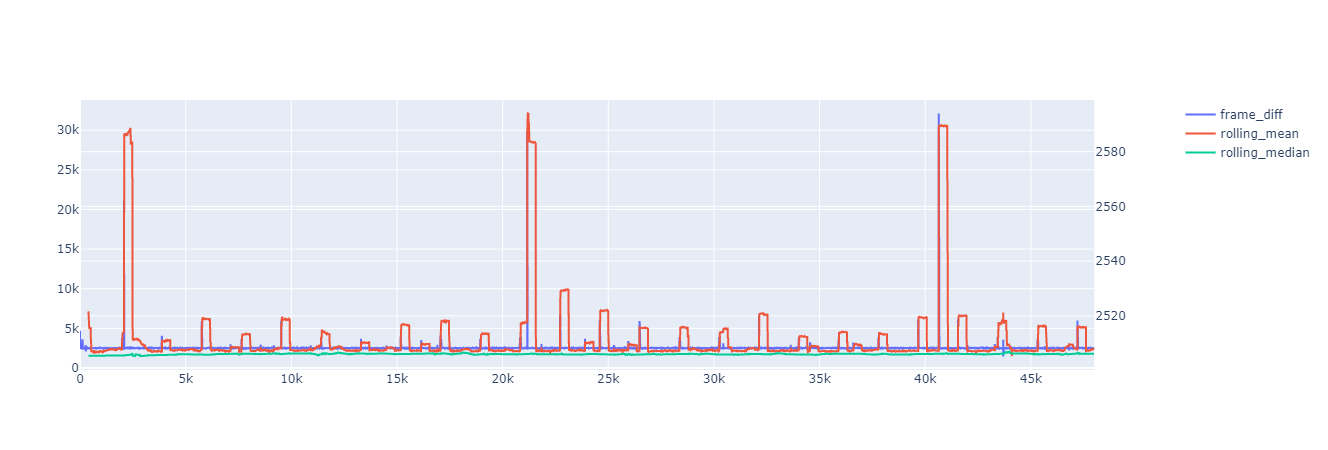

In [14]:
df_diffs['rolling_mean'] = df_diffs.rolling(window=400).frame_diff.mean()
df_diffs['rolling_median'] = df_diffs.rolling(window=400).frame_diff.median()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_diffs.index, y=df_diffs.frame_diff, name='frame_diff'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df_diffs.index, y=df_diffs.rolling_mean, name='rolling_mean'),#, opacity=.5),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=df_diffs.index, y=df_diffs.rolling_median, name='rolling_median'),#, opacity=.5),
    secondary_y=True,
)
fig.show()

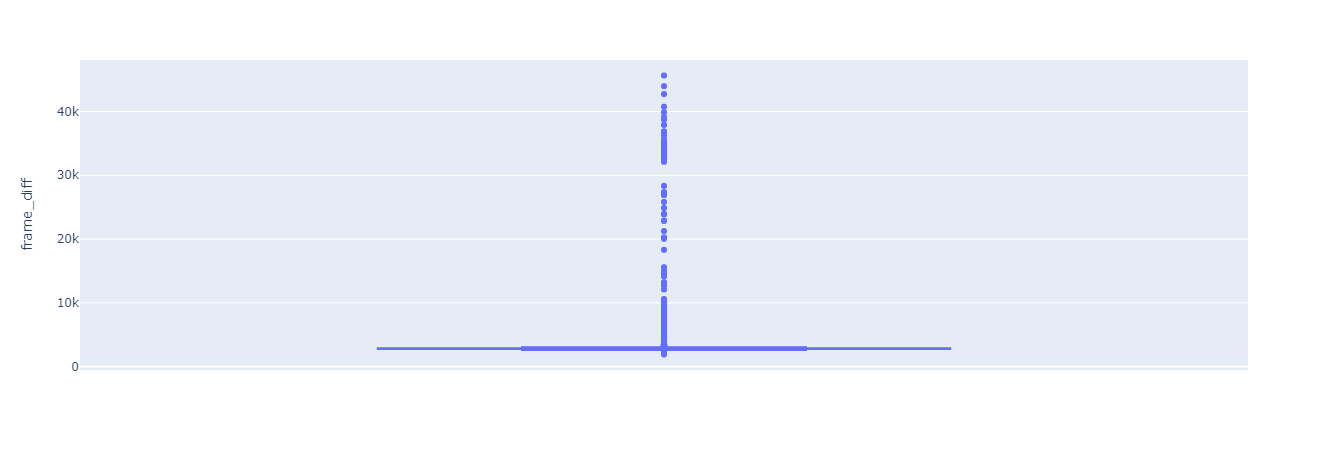

In [7]:
px.box(df_diffs, y='frame_diff')

In [8]:
df_modified = df.copy()
df_modified = df_modified.drop(0).reset_index().rename(columns={'index': 'frame_index'})
df_modified['theoretical_timestamp'] = df_modified.loc[0, 'timestamp'] + ((df_modified['frame_index']-1) * 2500)
df_modified['theoretical_deviation'] = df_modified.timestamp - df_modified.theoretical_timestamp
df_modified

frame_index   timestamp  theoretical_timestamp  theoretical_deviation
0                1   5366419.4              5366419.4                    0.0
1                2   5369458.8              5368919.4                  539.4
2                3   5372297.7              5371419.4                  878.3
3                4   5375111.2              5373919.4                 1191.8
4                5   5377935.6              5376419.4                 1516.2
...            ...         ...                    ...                    ...
23994        23995  75155401.9             65351419.4              9803982.5
23995        23996  75158168.8             65353919.4              9804249.4
23996        23997  75160932.5             65356419.4              9804513.1
23997        23998  75163712.6             65358919.4              9804793.2
23998        23999  75166500.0             65361419.4              9805080.6

[23999 rows x 4 columns]

In [9]:
(df.iloc[-1].timestamp - df.iloc[0].timestamp)/2500

27921.1826

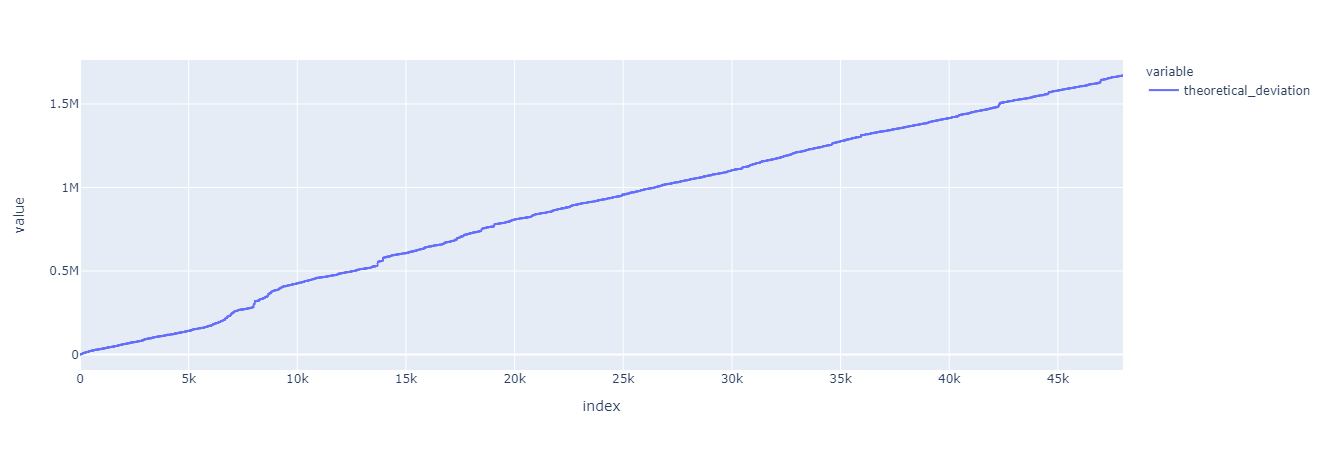

In [23]:
px.line(df_modified.theoretical_deviation)